# DECISION TREE ALGORITHM

# Problem Statement:
To create the Decision Tree classifier and visualize it graphically.

# Purpose:
To feed any new data to this classifier and it would be able to predict the right class accordingly.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Data

In [2]:
iris_data = pd.read_csv('Iris.csv')

# Viewing the dataset

In [3]:
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Structure of the data

In [4]:
iris_data.shape

(150, 6)

# Statistical description about the data

In [5]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Understanding the dataset

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Checking for missing values in the dataset

In [7]:
iris_data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [8]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [98]:
sns.set_style('whitegrid')

# Building Correlation Matrix

# 1.Heatmap
For understanding the correlation

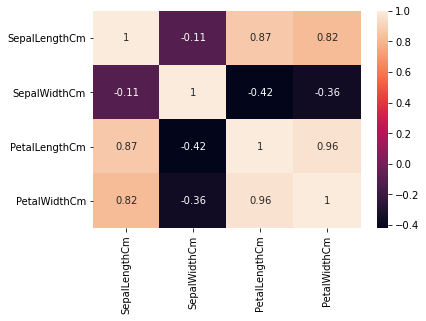

In [9]:
iris_new_data = iris_data.drop('Id', axis = 1)
sns.heatmap(iris_new_data.corr(), annot = True)

# 1.Pairplot

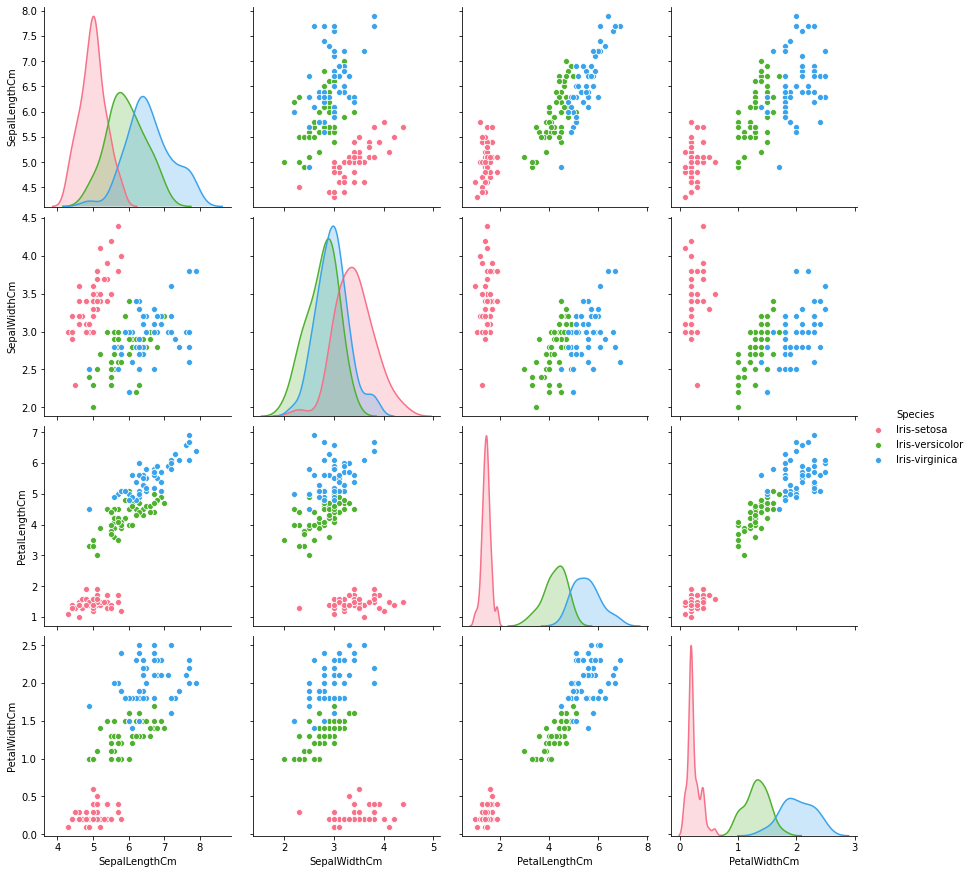

In [24]:
sns.pairplot(iris_new_data, hue="Species", palette="husl", height=3, diag_kind="kde")

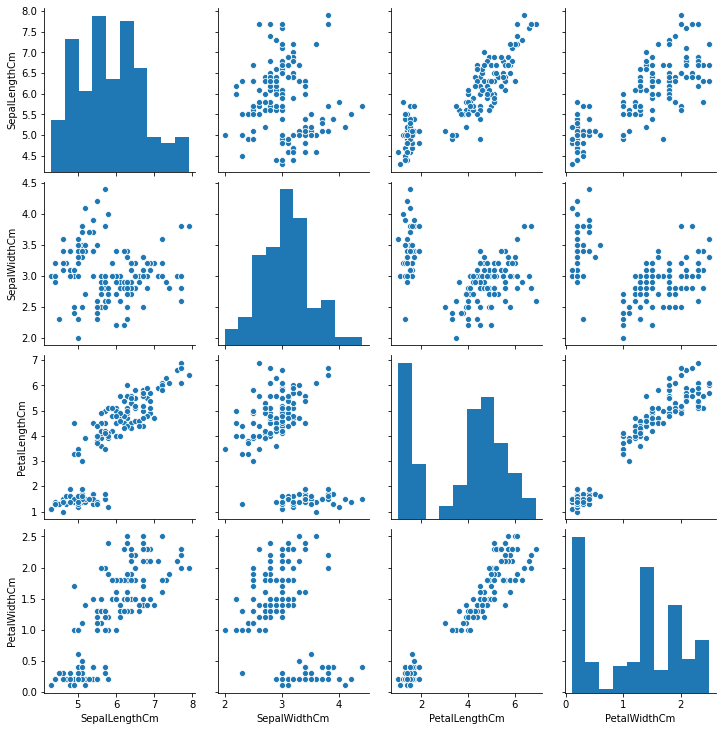

In [11]:
sns.pairplot(iris_new_data)

# Preparing the Data by splitting it into train & test

In [12]:
X = iris_data.iloc[:, 1:4].values
y = iris_data.iloc[:, -1].values

# Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the Dataset into Train and Test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Decision Tree Classification to the Training set

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier = classifier.fit(X_train, y_train)

# Predicting the Test set results

In [16]:
y_pred = classifier.predict(X_test)

# Comparing Actual and Predicted Values

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


# Evaluating the Model with the Confusion Matrix and Accuracy Score

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_pred)
print(conf)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


0.9666666666666667

# Viewing the decision Tree

# DECISION TREE FOR IRIS DATASET CLASSIFIER

[Text(1046.25, 2567.0, 'X[2] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(813.75, 2265.0, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(1278.75, 2265.0, 'X[2] <= 4.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(697.5, 1963.0, 'X[0] <= 4.95\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(465.0, 1661.0, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(232.5, 1359.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(697.5, 1359.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(930.0, 1661.0, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(1860.0, 1963.0, 'X[2] <= 5.05\ngini = 0.187\nsamples = 48\nvalue = [0, 5, 43]'),
 Text(1395.0, 1661.0, 'X[0] <= 6.5\ngini = 0.48\nsamples = 10\nvalue = [0, 4, 6]'),
 Text(1162.5, 1359.0, 'X[1] <= 3.1\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(930.0, 1057.0, 'X[0] <= 6.2\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(697.5, 755.0, 'gini = 0.0\nsamp

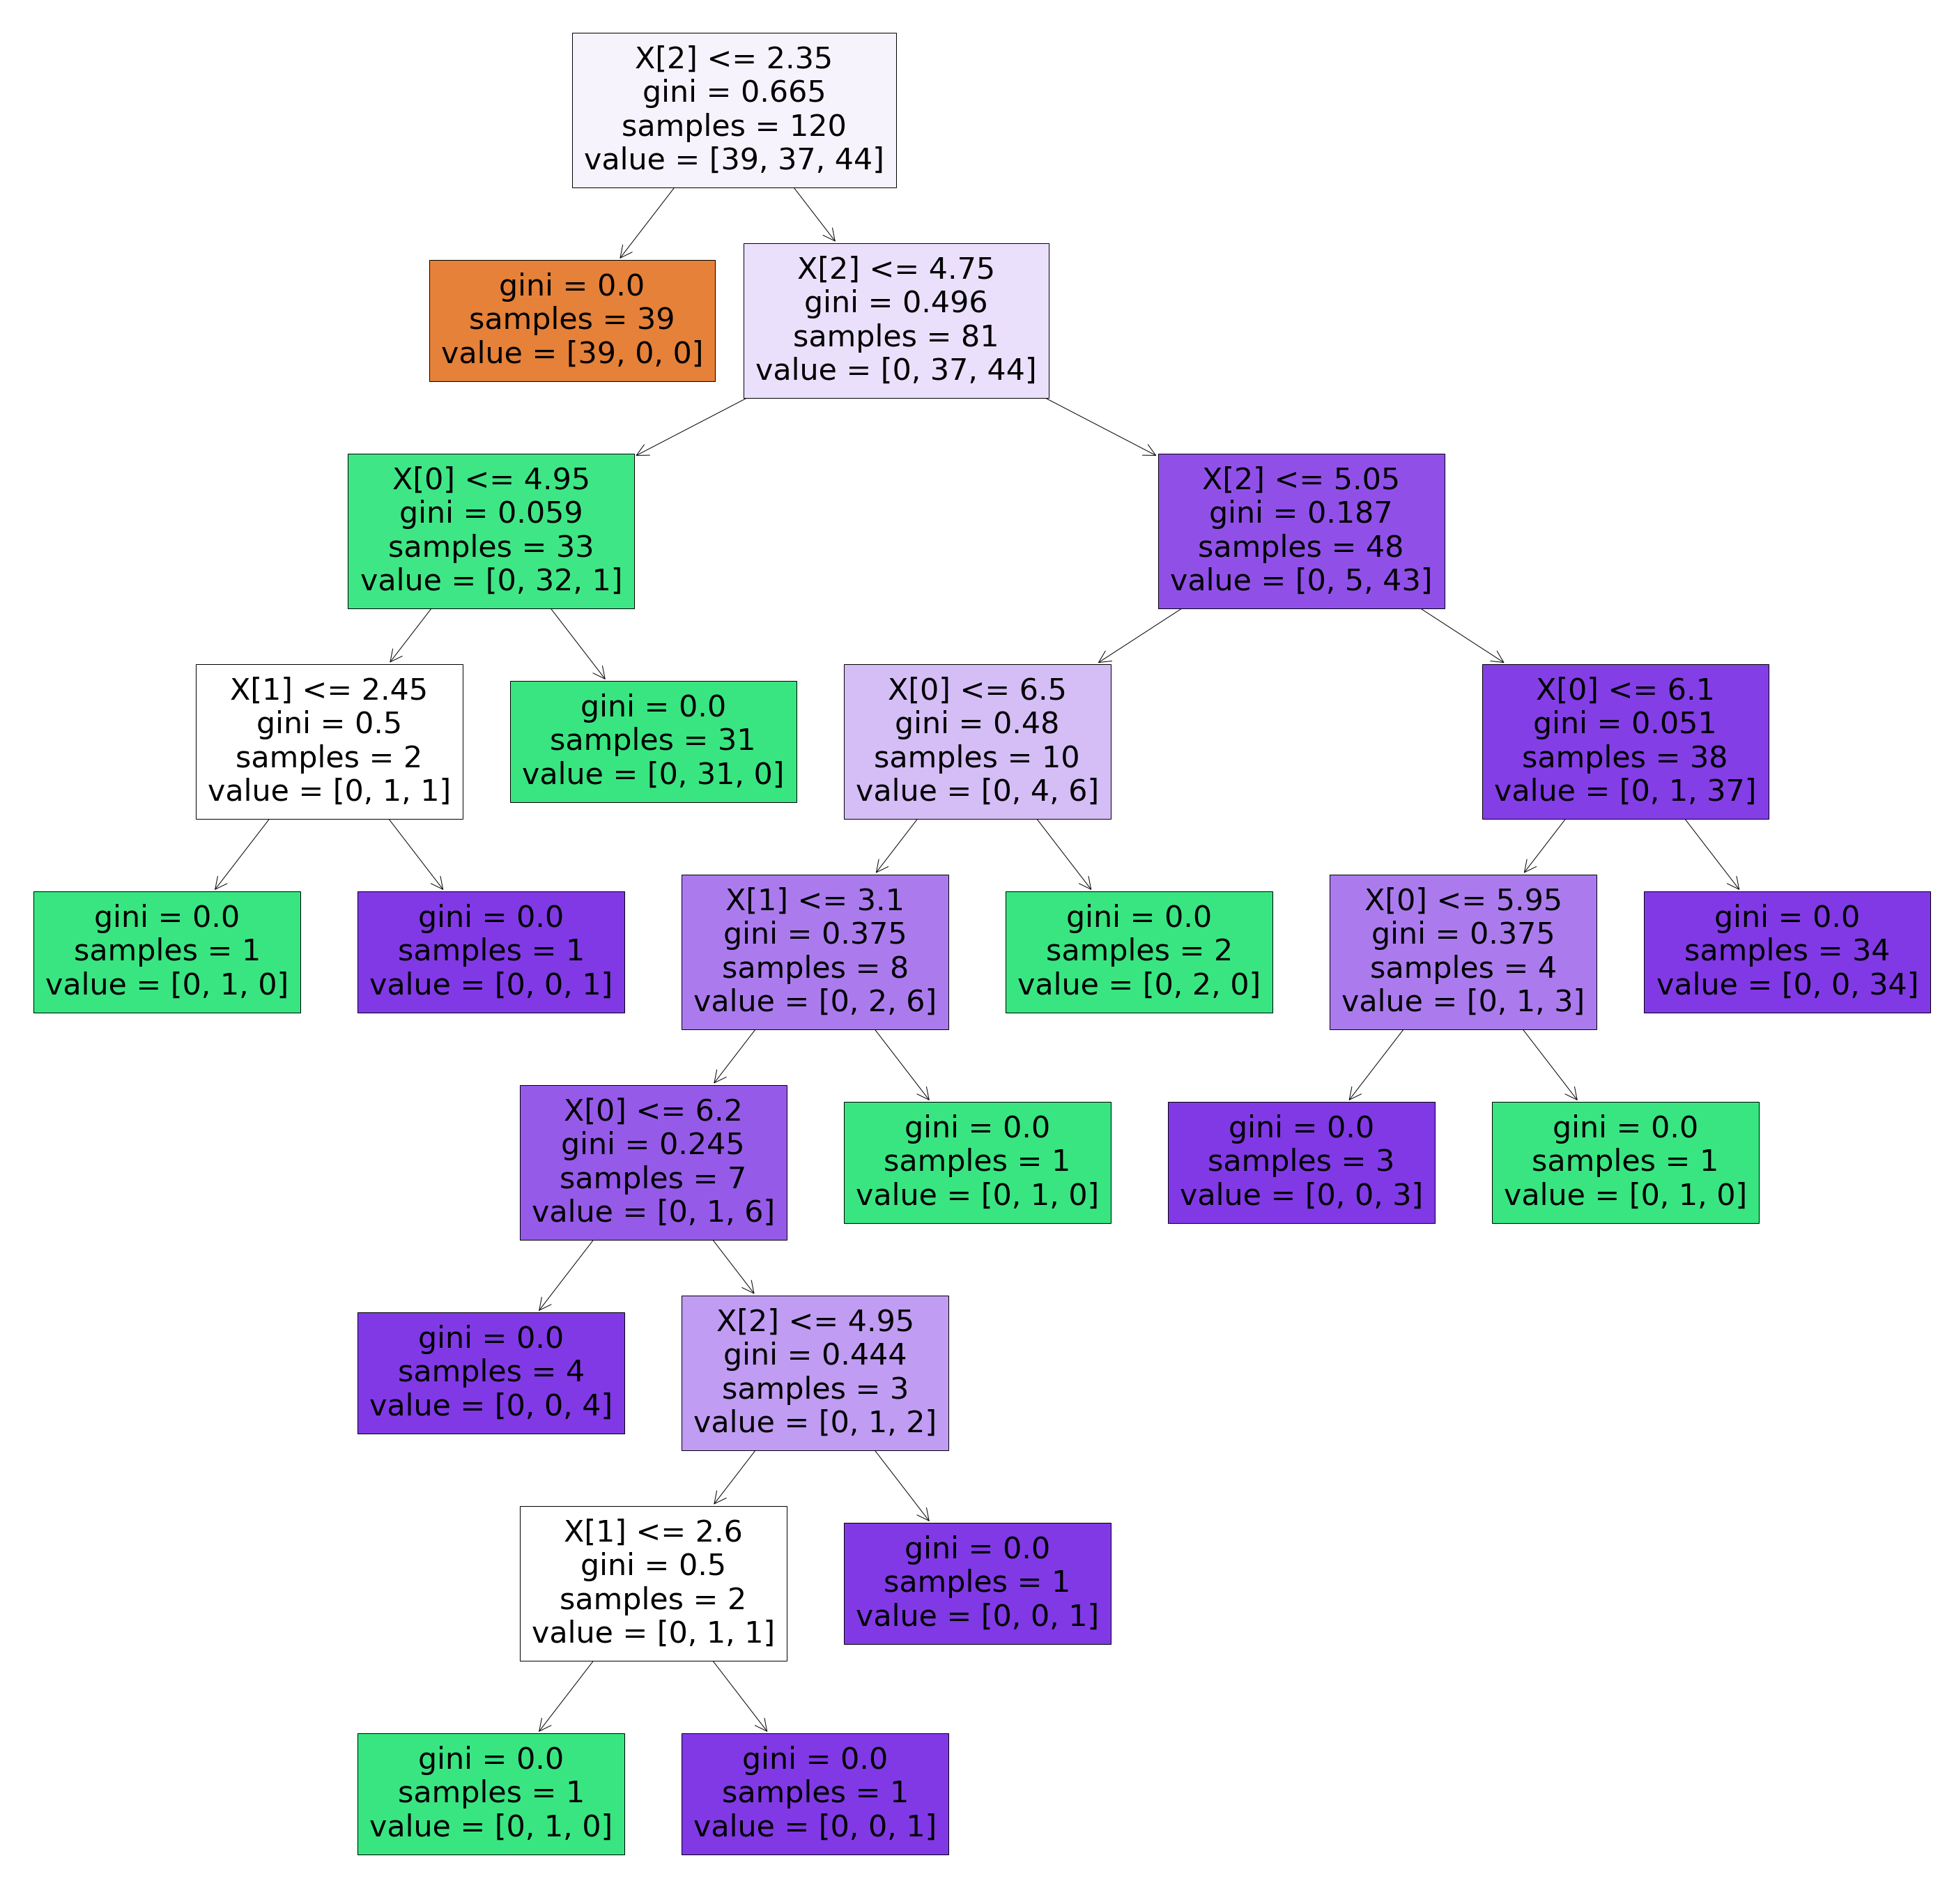

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(classifier, filled = True)

# Classification Report 

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

